In [1]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
((train_X, train_Y), (test_X, test_Y)) = mnist.load_data()

In [3]:
print(train_X.shape)

(60000, 28, 28)


In [4]:
print(test_X.shape)

(10000, 28, 28)


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

5


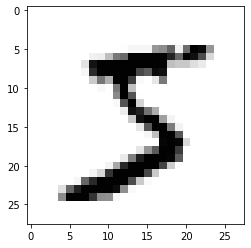

In [6]:
print(train_Y[0])
plt.imshow(tf.squeeze(train_X[0]), cmap = 'Greys')
plt.show()

In [7]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [8]:
from keras.utils import to_categorical

In [9]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [13]:
model.fit(train_X, train_Y_one_hot, batch_size = 64, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1468 - accuracy: 0.9567
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 3/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 8/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 9/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 10/10
60000/60000 [==============================

In [14]:
model.save('model.h5')

In [15]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)

10000/10000 [==============================] - 3s 274us/step


In [16]:
print('Test loss:', test_loss)

Test loss: 0.04015183128897649


In [17]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9909999966621399


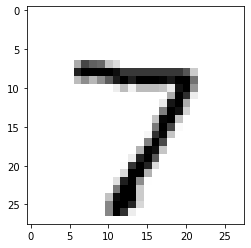

In [18]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [19]:
predictions = model.predict(test_X)

In [20]:
import numpy as np

In [21]:
print('Predicted value:', np.argmax(np.round(predictions[0])))

Predicted value: 7
